In [74]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.api import OLS
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.tree import DecisionTreeClassifier


import warnings
warnings.filterwarnings('ignore')

In [3]:
titanic = sns.load_dataset('titanic')
titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [33]:
titanic[['sex', 'survived', 'pclass', 'age', 'fare']].isnull().sum()

sex           0
survived      0
pclass        0
age         177
fare          0
dtype: int64

<AxesSubplot:xlabel='age', ylabel='Density'>

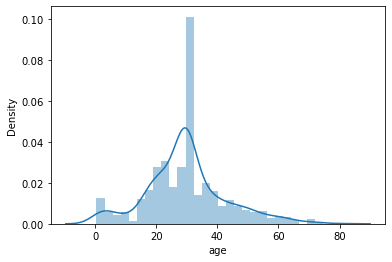

In [42]:
sns.distplot(titanic['age'])

In [34]:
titanic['age'].fillna(titanic['age'].mean(), inplace = True)

In [36]:
titanic[['age']].isnull().sum()

age    0
dtype: int64

In [37]:
x = titanic.drop(columns = ['survived', 'sibsp', 'parch', 'embarked', 'class', 'who', 'adult_male', 
                            'deck', 'embark_town', 'alive', 'alone'])
y = titanic['survived']

x = pd.get_dummies(x, columns = ['sex'], drop_first = True)
x

,pclass,age,fare,sex_male
0,3,22.000000,7.2500,1
1,1,38.000000,71.2833,0
2,3,26.000000,7.9250,0
3,1,35.000000,53.1000,0
4,3,35.000000,8.0500,1
...,...,...,...,...
886,2,27.000000,13.0000,1
887,1,19.000000,30.0000,0
888,3,29.699118,23.4500,0
889,1,26.000000,30.0000,1


In [38]:
x.describe()

,pclass,age,fare,sex_male
count,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.699118,32.204208,0.647587
std,0.836071,13.002015,49.693429,0.477990
min,1.000000,0.420000,0.000000,0.000000
25%,2.000000,22.000000,7.910400,0.000000
50%,3.000000,29.699118,14.454200,1.000000
75%,3.000000,35.000000,31.000000,1.000000
max,3.000000,80.000000,512.329200,1.000000


In [39]:
model = sm.Logit(y, sm.add_constant(x))
result = model.fit()

Optimization terminated successfully.
         Current function value: 0.451877
         Iterations 6


In [40]:
print(result.summary())

                           Logit Regression Results                           
Dep. Variable:               survived   No. Observations:                  891
Model:                          Logit   Df Residuals:                      886
Method:                           MLE   Df Model:                            4
Date:                Wed, 22 Sep 2021   Pseudo R-squ.:                  0.3214
Time:                        13:58:29   Log-Likelihood:                -402.62
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 2.888e-81
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6642      0.509      9.166      0.000       3.667       5.662
pclass        -1.1501      0.135     -8.504      0.000      -1.415      -0.885
age           -0.0332      0.007     -4.507      0.0

1. LLR P-Value: 0.0000.....288 // Minimal salah satu variable berpengaruh secara signifikan terhadap Survived
2. P-Value: 
    - Const   : 0.000
    - Pclass  : 0.000 < 0.05// Pclass berpengaruh secara negatif terhadap Survived, semakin besar angka Pclass semakin rendah untuk survived. (Pclass 1 - 3)
    - Age     : 0.000 < 0.05> // Age berpengaruh secara negatif terhadap survived, semakin besar angka age semakin rendah untuk survived. (Age 0.42 - 80)
    - Fare    : 0.777 > 0.05// Fare tidak berpengaruh terhadap survived. (Fare 0 - 512.33)
    - Sex_Male: 0.000 < 0.05 // Jika male maka peluang hidup lebih kecil dari pada female
3. Coef:
    - Const   : 4.6642
    - Pclass  : -1.1501
    - Age     : -0.0332
    - Fare    : 0.0006
    - Sex_male: -2.6071

## KNN

In [47]:
df = pd.read_csv(r'C:\Users\dheof\Desktop\a\cancer_data.csv')
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [48]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [57]:
x = df[['texture_mean', 'concave points_mean']]
y = df['diagnosis']
y = pd.get_dummies(y, columns = ['diagnosis'], drop_first = True)
y

,M
0,1
1,1
2,1
3,1
4,1
...,...
564,1
565,1
566,1
567,1


In [58]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    test_size = 0.2,
    random_state = 42
)

In [59]:
scaler = MinMaxScaler()
scaler.fit(x_train)
x_train_scaled = scaler.transform(x_train)
x_test_scaled = scaler.transform(x_test)

KKN WITHOUT SCALING

In [76]:
knn = KNeighborsClassifier(n_neighbors = 3)  
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [77]:
y_pred_class = knn.predict(x_test)

In [78]:
accuracy_score(y_test, y_pred_class)

0.7280701754385965

KNN WITH SCALING

In [79]:
knn_scaled = KNeighborsClassifier(n_neighbors = 3) 
knn_scaled.fit(x_train_scaled, y_train)

KNeighborsClassifier(n_neighbors=3)

In [80]:
y_pred_class_scaled = knn_scaled.predict(x_test_scaled)

In [81]:
accuracy_score(y_test, y_pred_class_scaled)

0.8947368421052632

In [67]:
k = range(1, 61, 2)
testing_accuracies = []
training_accuracies = []
score = 0

for i in k:
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train_scaled, y_train)

    y_pred_train = knn.predict(x_train_scaled)
    acc_train = accuracy_score(y_train, y_pred_train)
    training_accuracies.append(acc_train)

    y_pred_test = knn.predict(x_test_scaled)
    acc_test = accuracy_score(y_test, y_pred_test)
    testing_accuracies.append(acc_test)

    if score < acc_test:
        score = acc_test
        best_k = i

In [69]:
print(best_k)
print(score)

25
0.9473684210526315


Text(0, 0.5, 'Accuracy')

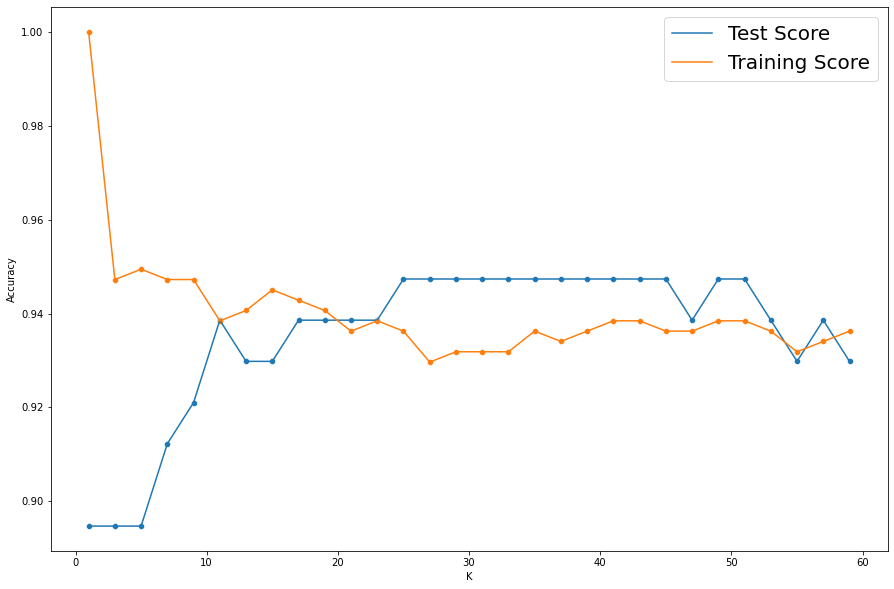

In [72]:
plt.figure(figsize=(15,10))

sns.lineplot(k, testing_accuracies)
sns.scatterplot(k, testing_accuracies)

sns.lineplot(k, training_accuracies)
sns.scatterplot(k, training_accuracies)

plt.legend(['Test Score', 'Training Score'], fontsize = 20)
plt.xlabel('K')
plt.ylabel('Accuracy')

## Decision Tree

### Without Scaling

In [75]:
tree = DecisionTreeClassifier(
    max_depth = 2,
    criterion = 'gini'
)